# Playground #1

## Getting started with the data and Pyspark
More Information see here: https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

In [2]:
import pyspark

In [3]:
# Using Pyspark -> JAVA needs to be installed in order to work.
spark = pyspark.sql.SparkSession.builder.appName("app1").getOrCreate()
sdf_1019 = spark.read.csv("data/2019-Oct.csv", header=True)
sdf_1019.show()



+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:...|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|  33.20|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:...|      view|  17200506|2053013559792632471|furniture.living_...|    null| 543.10|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:...|      view|   1004237|205301355563188265

In [4]:
sdf_1019.createOrReplaceTempView("Data")

## Getting started with ggplot2 in Python

More Information see here: https://realpython.com/ggplot-python/ 
Cheat Sheet: https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf


Sparksdataframe funktioniert nicht. Es muss ein Pandas-Dataframe sein: sdf.toPandas()

In [1]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

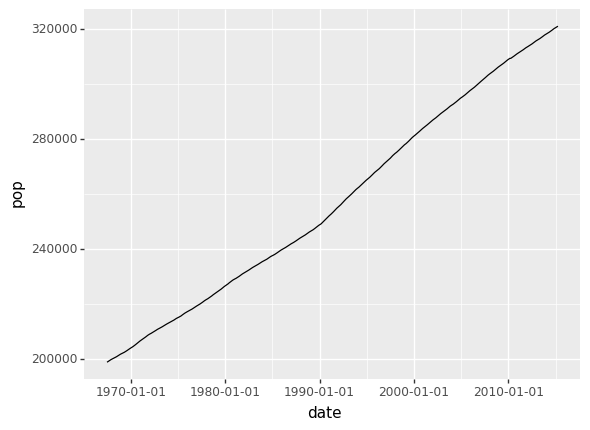

<ggplot: (116571210445)>

In [7]:
(
    ggplot(economics)  # What data to use
    + aes(x="date", y="pop")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

In [5]:
sdf_count_session_product=spark.sql("SELECT user_session, \
                                                 product_id, \
                                                 event_type, \
                                                 Count(*) AS Count \
                                          FROM Data \
                                          GROUP BY user_session, product_id, event_type \
                                              HAVING event_type= 'purchase' \
                                          ORDER BY Count DESC")
sdf_count_session_product.show()

+--------------------+----------+----------+-----+
|        user_session|product_id|event_type|Count|
+--------------------+----------+----------+-----+
|6860e076-5d5f-4a7...|   5100563|  purchase|   46|
|ec97b68f-7cb9-480...|   1005074|  purchase|   31|
|145959cc-c588-0f7...|   5100563|  purchase|   29|
|7df26835-e575-4a0...|   1005113|  purchase|   24|
|96793f0d-6f55-292...|   1201397|  purchase|   22|
|1ba46f97-e7c3-459...|   5100563|  purchase|   21|
|ee1ef0ba-0712-4db...|  50300160|  purchase|   20|
|c04e8f89-1fa6-4c1...|   1004247|  purchase|   19|
|788435a8-7898-453...|  12300181|  purchase|   18|
|06680c58-8084-492...|   1004767|  purchase|   18|
|605bc52a-3395-477...|   5100563|  purchase|   18|
|492d5929-f475-468...|   3701432|  purchase|   18|
|34b9eb67-4755-49c...|   1004767|  purchase|   17|
|5bc0f8c1-3d15-442...|   1005121|  purchase|   17|
|0eedef43-b496-46a...|   1004856|  purchase|   17|
|d1db5b37-6af2-4b4...|   1005121|  purchase|   16|
|b7396a89-525b-43a...|   130635

In [22]:
import plotly.graph_objects as go
fig = go.Figure()
prediction_group = ['Gruppe 0', 'Gruppe 1', 'Gruppe 2', 'Gruppe 3', 'Gruppe 4']
feature_names = ["avg_turnover_per_session", "avg_events_per_session", "sum_turnover", "count_session"]
avg_per_feature =
for feature in feature_names:
    fig.add_trace(go.Bar(
      x = [prediction_group,
           [feature for _ in range(len(prediction_group))]],
      y = [2, 3, 1, 5],
      name = feature,
    ))

# fig.add_trace(go.Bar(
#   x = [prediction_group,
#        ["B" for _ in range(len(prediction_group))]],
#   y = [8, 3, 6, 5],
#   name = "Children",
# ))

fig.update_layout(title_text="Multi-category axis")

fig.show()

In [23]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    name='Control',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[3, 6, 4],
    error_y=dict(type='data', array=[1, 0.5, 1.5])
))
fig.add_trace(go.Bar(
    name='Experimental',
    x=['Trial 1', 'Trial 2', 'Trial 3'], y=[4, 7, 3],
    error_y=dict(type='data', array=[0.5, 1, 2])
))
fig.update_layout(barmode='group')
fig.show()


In [28]:
import pyspark
spark = pyspark.sql.SparkSession \
    .builder \
    .master("local") \
    .appName("app_great") \
    .config("spark.executor.memory", f"16g") \
    .config("spark.driver.memory", f"16g") \
    .config("spark.memory.offHeap.enabled", True) \
    .config("spark.memory.offHeap.size", f"16g") \
    .config("spark.sql.debug.maxToStringFields", f"16") \
    .getOrCreate()
sc = spark.sparkContext

In [29]:
from pyspark.sql import functions as F

df = spark.createDataFrame(sc.parallelize([['a', [1,2,3], [1,2,3]], ['b', [2,3,4], [2,3,4]]]), ["id", "var1", "var2"])

columns = df.drop('id').columns
df_sizes = df.select(*[F.size(col).alias(col) for col in columns])
df_max = df_sizes.agg(*[F.max(col).alias(col) for col in columns])
max_dict = df_max.collect()[0].asDict()

df_result = df.select('id', *[df[col][i] for col in columns for i in range(max_dict[col])])
df_result.show()


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 1.0 failed 1 times, most recent failure: Lost task 0.0 in stage 1.0 (TID 1) (DESKTOP-JKUQRDK executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2253)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2202)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2201)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2201)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1078)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1078)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2440)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2382)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2371)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2202)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2223)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2242)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 14 more
